In [1]:
'''
import os
import shutil
import pandas as pd
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
'''
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [2]:
labels = ['non_covid', 'covid']

img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
data = get_data('../data_for_keras')

/var/folders/wp/n601q0l53qx2yww21jgh15v00000gn/T/ipykernel_52667/1171864864.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [4]:
print (data.shape)

(929, 2)


In [5]:
print (data[0][0].shape)

(224, 224, 3)


In [6]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(data, test_size=0.2)

In [7]:
print (train.shape)
print (val.shape)

(743, 2)
(186, 2)


In [8]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [9]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [10]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

2022-04-12 00:10:24.198613: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/Users/punmehta/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
epochs = 50
history = model.fit(x_train, y_train, epochs=epochs, validation_data = (x_val, y_val))

Epoch 1/50


/Users/punmehta/anaconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


24/24 [==============================] - 14s 566ms/step - loss: 0.6723 - accuracy: 0.6070 - val_loss: 0.6746 - val_accuracy: 0.5806
Epoch 2/50
24/24 [==============================] - 14s 584ms/step - loss: 0.6708 - accuracy: 0.6110 - val_loss: 0.6739 - val_accuracy: 0.5806
Epoch 3/50
24/24 [==============================] - 14s 584ms/step - loss: 0.6673 - accuracy: 0.6124 - val_loss: 0.6729 - val_accuracy: 0.5806
Epoch 4/50
24/24 [==============================] - 14s 602ms/step - loss: 0.6648 - accuracy: 0.6110 - val_loss: 0.6721 - val_accuracy: 0.5806
Epoch 5/50
24/24 [==============================] - 14s 601ms/step - loss: 0.6686 - accuracy: 0.6110 - val_loss: 0.6714 - val_accuracy: 0.5806
Epoch 6/50
24/24 [==============================] - 14s 599ms/step - loss: 0.6674 - accuracy: 0.6124 - val_loss: 0.6702 - val_accuracy: 0.5806
Epoch 7/50
24/24 [==============================] - 18s 763ms/step - loss: 0.6631 - accuracy: 0.6124 - val_loss: 0.6695 - val_accuracy: 0.5806
Epoch 8/50

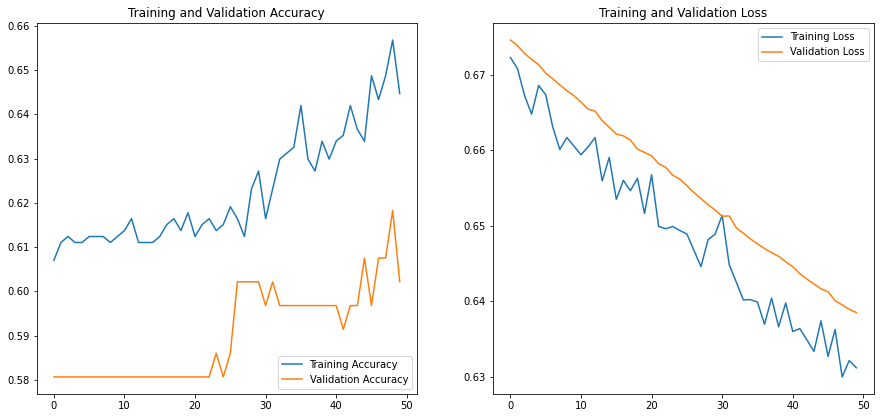

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [14]:
predictions = model.predict(x_val)
print (predictions.shape)
print (predictions[0])
#predictions = predictions.reshape(1,-1)[0]
classes_x=np.argmax(predictions,axis=1)
print (classes_x.shape)
print (classes_x[0])
print(classification_report(y_val, classes_x, target_names = ['non_covid (Class 0)','covid (Class 1)']))

(186, 2)
[0.5058044  0.49419558]
(186,)
0
                     precision    recall  f1-score   support

non_covid (Class 0)       0.62      0.13      0.21        78
    covid (Class 1)       0.60      0.94      0.73       108

           accuracy                           0.60       186
          macro avg       0.61      0.54      0.47       186
       weighted avg       0.61      0.60      0.52       186



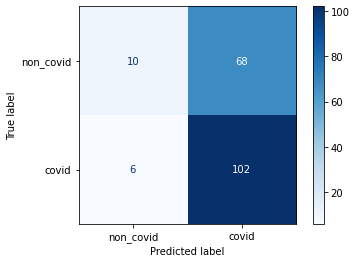

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ["non_covid", "covid"]

cm = confusion_matrix(y_val, classes_x)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()